In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.metrics import f1_score, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [11]:
os.listdir('../input')

['vizwiz']

In [12]:
os.listdir('../input/vizwiz/data')

['PythonEvaluationTools',
 'Results',
 '._PythonEvaluationTools',
 'README.md',
 'Annotations',
 '._README.md',
 'Images',
 '._Results',
 '._PythonHelperTools',
 '._Images',
 '._Annotations',
 'PythonHelperTools']

In [13]:
__author__ = 'QingLi'
__version__ = '1.0'

# Interface for accessing the VQA dataset.

# This code is based on the code written by Qing Li for VizWiz Python API available at the following link: 
# (https://github.com/xxx)

# The following functions are defined:
#  VQA        - VQA class that loads VQA annotation file and prepares data structures.
#  getQuesIds - Get question ids that satisfy given filter conditions.
#  getImgIds  - Get image ids that satisfy given filter conditions.
#  loadQA     - Load questions and answers with the specified question ids.
#  showQA     - Display the specified questions and answers.
#  loadRes    - Load result file and create result object.

# Help on each function can be accessed by: "help(COCO.function)"

import json
import datetime
import copy

class VQA:
	def __init__(self, annotation_file=None):
		"""
	   	Constructor of VQA helper class for reading and visualizing questions and answers.
		:param annotation_file (str): location of VQA annotation file
		:return:
		"""
		# load dataset
		self.dataset = {}
		self.imgToQA = {}
		if annotation_file != None:
			print('loading dataset into memory...')
			time_t = datetime.datetime.utcnow()
			dataset = json.load(open(annotation_file, 'r'))
			print(datetime.datetime.utcnow() - time_t)
			self.dataset = dataset
			self.imgToQA = {x['image']:x for x in dataset}

	def getImgs(self):
		#print("this is comment :",self.imgToQA.keys().get(0))
		return self.imgToQA.keys()

	def getAnns(self, imgs=[], ansTypes=[]):
		"""
		Get annotations that satisfy given filter conditions. default skips that filter
		:param  imgs (str array): get annotations for given image names
				ansTypes  (str array)   : get annotations for given answer types
		:return: annotations  (dict array)   : dict array of annotations
		"""
		anns = self.dataset

		imgs = imgs if type(imgs) == list else [imgs]
		if len(imgs) != 0:
# 			anns=[]
# 			for img in imgs[0] :
# 				print("img is ",img)
# 				anns.append(self.imgToQA[img])
# 			print("img is ",img)
			anns = [self.imgToQA[img] for img in imgs[0]]

		ansTypes  = ansTypes  if type(ansTypes)  == list else [ansTypes]
		if len(ansTypes) != 0:
			anns = [ann for ann in anns if ann['answer_type'] in ansTypes]
		return anns

	def showQA(self, anns):
		"""
		Display the specified annotations.
		:param anns (array of object): annotations to display
		:return: None
		"""
		if len(anns) == 0:
			return 0
		for ann in anns:
			print("Question: %s"%ann['question'])
			print("Answer: ")
			print('\n'.join([x['answer'] for x in ann['answers']]))

loading dataset into memory...
0:00:00.345764
Question: Is my TV on? Is 
Answer: 
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


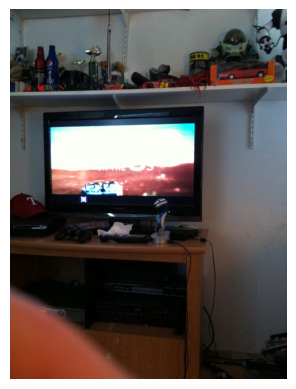

Question: What color is this pepper?
Answer: 
yellow orange
orange
orange
orange
orange
orange
orange
orange
orange
orange


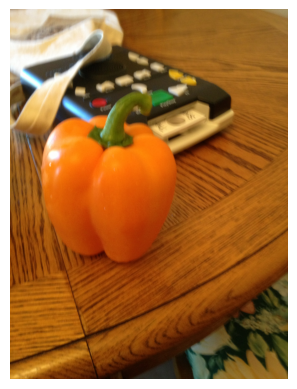

In [14]:
# coding: utf-8

#from vqaTools.vqa import VQA
import random
import skimage.io as io
import matplotlib.pyplot as plt
import os

dataDir='../input/vizwiz/data'
split = 'train'
annFile='%s/Annotations/%s.json'%(dataDir, split)
imgDir = '%s/Images/' %dataDir

# initialize VQA api for QA annotations
vqa=VQA(annFile)

# load and display QA annotations for given answer types
"""
ansTypes can be one of the following
yes/no
number
other
unanswerable
"""
anns = vqa.getAnns(ansTypes='yes/no');   
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgFilename = randomAnn['image']
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()

# load and display QA annotations for given images
imgs = vqa.getImgs()
anns = vqa.getAnns(imgs=imgs)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])  
imgFilename = randomAnn['image']
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()

In [15]:
print(len(imgs))
print(len(anns))

20000
20000


In [16]:
print(list(imgs)[3])

VizWiz_train_000000000003.jpg


In [17]:
# images = []
# img = plt.imread('../input/vizwiz/data/Images/'+list(imgs)[19999])
# plt.imshow(img)

# for i in tqdm(list(imgs)): 
#     img = plt.imread('../input/vizwiz/data/Images/'+i)
#     img = cv2.resize(img, (128,128))
#     images.append(img)
    
# plt.imshow(images[0])
# print(img.shape)

In [18]:
anns[1]

{'answerable': 1,
 'image': 'VizWiz_train_000000000001.jpg',
 'question': 'Can you tell me what is in this can please?',
 'answer_type': 'other',
 'answers': [{'answer_confidence': 'yes', 'answer': 'soda'},
  {'answer_confidence': 'yes', 'answer': 'coca cola'},
  {'answer_confidence': 'maybe', 'answer': 'coca cola'},
  {'answer_confidence': 'yes', 'answer': 'unsuitable'},
  {'answer_confidence': 'yes', 'answer': 'unsuitable'},
  {'answer_confidence': 'yes', 'answer': 'coke 0'},
  {'answer_confidence': 'yes', 'answer': 'coca cola 0'},
  {'answer_confidence': 'maybe', 'answer': 'coke 0'},
  {'answer_confidence': 'maybe', 'answer': 'coca cola'},
  {'answer_confidence': 'yes', 'answer': 'coke'}]}

In [19]:
anns[0]['answerable']

1

In [20]:
def get_majority(answers):
    maj_dict = {}
    for answer in answers:
        if answer['answer_confidence'] == "yes":
            f = maj_dict.get(answer['answer'])
            if f != None:
                maj_dict[answer['answer']] +=1
            else:
                maj_dict[answer['answer']] = 1
    
    if len(maj_dict.keys()) == 0 :return None
    
    maxx = maj_dict.get(list(maj_dict.keys())[0])
    maxkey = list(maj_dict.keys())[0]
    for i in list(maj_dict.keys()):
        if maj_dict.get(i) > maxx : 
            maxx = maj_dict.get(i)
            maxkey = i
            
    return maxkey
        


data = {
    'images' : [],
    'question' : [],
    'answerable' : [],
    'answer_type' : [],
    'answer' : []
}

for i in tqdm(range(len(list(imgs)))):
    #print(anns[i]['answers'])
    answer = get_majority(anns[i]['answers'])
    if answer != None:
        data['images'].append(list(imgs)[i])
        data['question'].append(anns[i]['question'])
        data['answerable'].append(anns[i]['answerable'])
        data['answer_type'].append(anns[i]['answer_type'])
        data['answer'].append(answer)
    

    
#     if (anns[int(i/10)]['answers'][i%10]['answer_confidence']) == 'yes' :
#         data['images'].append(list(imgs)[int(i/10)])
#         data['question'].append(anns[int(i/10)]['question'])
#         data['answerable'].append(anns[int(i/10)]['answerable'])
#         data['answer_type'].append(anns[int(i/10)]['answer_type'])
#         data['answer'].append(anns[int(i/10)]['answers'][i%10]['answer'])

df = pd.DataFrame(data)
df.head()

100%|██████████| 20000/20000 [00:07<00:00, 2694.56it/s]


,images,question,answerable,answer_type,answer
0,VizWiz_train_000000000000.jpg,What's the name of this product?,1,other,basil leaves
1,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,1,other,unsuitable
2,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,1,other,tomatoes
3,VizWiz_train_000000000003.jpg,What is the captcha on this screenshot?,1,other,t36m
4,VizWiz_train_000000000004.jpg,What is this item?,1,other,solar garden light


In [21]:
len(np.unique(df['answer']))

5860

In [22]:
df[['images', 'question']]

,images,question
0,VizWiz_train_000000000000.jpg,What's the name of this product?
1,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?
2,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...
3,VizWiz_train_000000000003.jpg,What is the captcha on this screenshot?
4,VizWiz_train_000000000004.jpg,What is this item?
...,...,...
19995,VizWiz_train_000000019995.jpg,"Wat is that, please?"
19996,VizWiz_train_000000019996.jpg,What brand of shoe is this?
19997,VizWiz_train_000000019997.jpg,What is this?
19998,VizWiz_train_000000019998.jpg,What is this ?


In [23]:
df.head(10)

,images,question,answerable,answer_type,answer
0,VizWiz_train_000000000000.jpg,What's the name of this product?,1,other,basil leaves
1,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,1,other,unsuitable
2,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,1,other,tomatoes
3,VizWiz_train_000000000003.jpg,What is the captcha on this screenshot?,1,other,t36m
4,VizWiz_train_000000000004.jpg,What is this item?,1,other,solar garden light
5,VizWiz_train_000000000005.jpg,What's this?,1,other,boots
6,VizWiz_train_000000000006.jpg,What is in this bottle?,1,other,mouthwash
7,VizWiz_train_000000000007.jpg,This item.,1,other,monitor cleaning kit
8,VizWiz_train_000000000008.jpg,What color do these look?,1,other,orange
9,VizWiz_train_000000000009.jpg,Surface look clean? Thank you.,1,yes/no,yes


In [24]:
le = LabelEncoder()
df['answerable_coded'] = le.fit_transform(df['answerable'])
df['answer_type_coded'] = le.fit_transform(df['answer_type'])
df['answer_coded'] = le.fit_transform(df['answer'])
df.head()

,images,question,answerable,answer_type,answer,answerable_coded,answer_type_coded,answer_coded
0,VizWiz_train_000000000000.jpg,What's the name of this product?,1,other,basil leaves,1,1,629
1,VizWiz_train_000000000001.jpg,Can you tell me what is in this can please?,1,other,unsuitable,1,1,5455
2,VizWiz_train_000000000002.jpg,Is this enchilada sauce or is this tomatoes? ...,1,other,tomatoes,1,1,5311
3,VizWiz_train_000000000003.jpg,What is the captcha on this screenshot?,1,other,t36m,1,1,5109
4,VizWiz_train_000000000004.jpg,What is this item?,1,other,solar garden light,1,1,4830


In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[['images', 'question']], df[['answerable_coded', 'answer_type_coded', 'answer_coded']], test_size=0.05, random_state=42, stratify=df['answer_type_coded'])

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=42)

In [27]:
x_train

,images,question
12985,VizWiz_train_000000012985.jpg,What kind of coffee is this?
1150,VizWiz_train_000000001150.jpg,Are these the Apple cinnamon or strawberry cer...
14922,VizWiz_train_000000014922.jpg,What kind of pie is this?
1064,VizWiz_train_000000001064.jpg,Is this Kraft Catalina Class or Kraft Catalina...
17492,VizWiz_train_000000017492.jpg,What type of mail is this?
...,...,...
9001,VizWiz_train_000000009001.jpg,What is this picture?
3502,VizWiz_train_000000003502.jpg,"I'm using this new app, trying out this new se..."
2267,VizWiz_train_000000002267.jpg,What is the expiration date?
19855,VizWiz_train_000000019855.jpg,What color is my shirt?


In [28]:
y_train

,answerable_coded,answer_type_coded,answer_coded
12985,0,2,5455
1150,1,1,5008
14922,1,1,1420
1064,1,2,1485
17492,1,2,3309
...,...,...,...
9001,1,1,3151
3502,0,2,5455
2267,0,2,1840
19855,0,2,5455


# NON-Sequential model

In [29]:
conda clean -y --all

There are no unused tarball(s) to remove.
Will remove 1 index cache(s).
There are no unused package(s) to remove.
There are no tempfile(s) to remove.
There are no logfile(s) to remove.

Note: you may need to restart the kernel to use updated packages.


In [30]:
conda config --remove channels conda-forge 


CondaKeyError: 'channels': 'conda-forge' is not in the 'channels' key of the config file


Note: you may need to restart the kernel to use updated packages.


In [31]:
conda config --add channels rapidsai


Note: you may need to restart the kernel to use updated packages.


In [32]:
#conda install --yes -c pytorch -c conda-forge pytorch=1.7.1 torchvision cudatoolkit=11.0

In [33]:
conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0


# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
        yield
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 127, in repodata
        response.raise_for_status()
      File "/opt/conda/lib/python3.10/site-packages/requests/models.py", line 1021, in raise_for_status
        raise HTTPError(http_error_msg, response=self)
    requests.exceptions.HTTPError: 404 Client Error: Not Found for url: https://conda.anaconda.org/rapidsai/linux-64/current_repodata.json
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/requests/models.py", line 971, in json
        return complexjson.loads(self.text, **kwargs)
      File "/opt/conda/lib/python3.10/site-packages

In [34]:
pip install ftfy regex tqdm

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-yk2soc6y
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-yk2soc6y
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [36]:
import torch
import clip
import torch.nn as nn
#"ViT-L/14@336px"

class VQAmodel(nn.Module):
    def __init__(self, answers_num_classes,
                     ansewr_type_num_classes, 
                     answerable_num_classes,
                     clip_type):
        super(VQAmodel, self).__init__()
        
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.clip_model, self.preprocess = clip.load(clip_type, self.device)
        embedding_size = {
            "ViT-L/14@336px" : 768,
            "RN50x64" : 1024
        }
        
        self.ln1 = nn.LayerNorm(embedding_size[clip_type]*2).to(self.device)
        self.dp1 = nn.Dropout(0.5).to(self.device)
        self.fc1 = nn.Linear(embedding_size[clip_type]*2,  512).to(self.device)
        
        self.ln2 = nn.LayerNorm(512).to(self.device)
        self.dp2 = nn.Dropout(0.5).to(self.device)
        self.fc2 = nn.Linear(512,  answers_num_classes).to(self.device)
        
        self.fc_aux = nn.Linear(512,  ansewr_type_num_classes).to(self.device)
        self.fc_gate = nn.Linear(ansewr_type_num_classes,  answers_num_classes).to(self.device)
        self.act_gate = nn.Sigmoid().to(self.device)
        
        self.fc3 = nn.Linear(512,  answerable_num_classes).to(self.device)
        self.act3 = nn.Sigmoid().to(self.device)
        
    def forward(self, image, question):
        image_features, text_features = self.encode_image_text(image, question)
        image_features = image_features.to(self.device).to(torch.float32)
        text_features = text_features.to(self.device).to(torch.float32)
        
        combined_features = torch.cat((text_features, image_features), dim=-1).to(self.device).to(torch.float32)
        x = self.ln1(combined_features)
        x = self.dp1(x)
        x = self.fc1(x)
        
        aux = self.fc_aux(x)
        gate = self.fc_gate(aux)
        gate = self.act_gate(gate)
        
        ans = self.ln2(x)
        ans = self.dp2(ans)
        vqa = self.fc2(ans)
        
        output = vqa * gate
        
        ansable = self.fc3(x)
        ansable = self.act3(ansable)
        
        return output, aux, ansable
    
    def encode_image_text(self, image, question):
        device = "cuda" if torch.cuda.is_available() else "cpu"
        #model, preprocess = clip.load("ViT-L/14@336px", device=device)
        self.clip_model.to(device)
        image.to(device)
        
        #image = self.preprocess(image)#.to(device)
        text = clip.tokenize(list(question)).to(device)

        with torch.no_grad():
            image_features = self.clip_model.encode_image(image)
            text_features = self.clip_model.encode_text(text)
        return image_features, text_features
        
        
#         self.image_encoder = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.LayerNorm(256),
#             nn.Dropout(0.5),
#             nn.ReLU()
#         ).to(self.device)
        
#         self.text_encoder = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.LayerNorm(256),
#             nn.Dropout(0.5),
#             nn.ReLU()
#         ).to(self.device)
        
        
#         self.linear = nn.Linear(1536, num_classes).to(self.device)
    
#     def forward(self, image, question):
        
#         #image = [transforms.ToPILImage()(img).convert("RGB") for img in image]
#         image_features, text_features = self.encode_image_text(image, question)
# #         text_features = self.encode_text(question)
# #         image_features = self.encode_image(image)
#         image_features = image_features.to(self.device).to(torch.float32)
#         text_features = text_features.to(self.device).to(torch.float32)
        
# #         print("type of image_features :", image_features.dtype)
# #         print("type of text_features :", text_features.dtype)
#         combined_features = torch.cat((text_features, image_features), dim=1)
        
#         combined_features = combined_features.to(self.device).to(torch.float32)
# #         print("type of combined :", combined_features.dtype)
#         output = self.linear(combined_features)
#         return output

In [37]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

batch_size = 256
shuffle = True

#  text_inputs, image_inputs, labels
class VQADataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.image_inputs = x['images']
        self.text_inputs = x['question']
        self.answer_label = y['answer_coded']
        self.answer_type_label = y['answer_type_coded']
        self.answerable_label = y['answerable_coded']
        self.transform = transform
#         self.answerable = data['answerable']
#         self.answer_type = data['answer_type']

    def __len__(self):
        return len(self.image_inputs)

    def __getitem__(self, index):
        imgFilename = self.image_inputs.iloc[[index]].values[0]
#         print(imgFilename)
        imagepath = '../input/vizwiz/data/Images/'+ imgFilename
        img = plt.imread(imagepath)
#         plt.imshow(img)
    
        
        text_inputs = self.text_inputs.iloc[index]
    
        if self.transform :
            img = self.transform(img)
    
        image_inputs = img
        answer_label = self.answer_label.iloc[index]
        answer_type_label = self.answer_type_label.iloc[index]
        answerable_label = self.answerable_label.iloc[index]
        
        
            
        
        #print(text_inputs)
        #print(type(text_inputs))
        #print(labels)
        #print(type(labels))
        #print("image shape is :", img.shape)
        #print("image type is :", type(img))

        
        return image_inputs, text_inputs, answer_label, answer_type_label, answerable_label


In [38]:
# x_train = np.array(x_train)
# x_train = torch.from_numpy(x_train)

# y_train = np.array(y_train)
# y_train = torch.from_numpy(y_train)
#train_data_loader
train_dataset = VQADataset(x_train, y_train, transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((336,336)),
                    transforms.RandomRotation(30),
                    transforms.ToTensor()
                ]))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

In [39]:
#validation_data_loader
validation_dataset = VQADataset(x_val, y_val, transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((336,336)),
                    transforms.RandomRotation(30),
                    transforms.ToTensor()
                ]))
validation_data_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=shuffle)

In [40]:
# vqaModel = VQAmodel(np.unique(df['answer']))
torch.cuda.empty_cache()

clip_type = "ViT-L/14@336px"
answer_num_classes = len(np.unique(df['answer_coded']))
answer_type_num_classes = len(np.unique(df['answer_type_coded']))
answerable_num_classes = len(np.unique(df['answerable_coded']))

vqaModel = VQAmodel(answer_num_classes, answer_type_num_classes, answerable_num_classes, clip_type)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vqaModel.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loss_total = []
val_loss_total = []

for param in vqaModel.clip_model.parameters():
    param.requires_grad = False

num_epochs = 5
for epoch in range(num_epochs):
    vqaModel.train()
    running_loss = 0.0 
    val_running_loss = 0.0 
    
    for image_inputs, text_inputs, answer_label, answer_type_label, answerable_label in tqdm(train_data_loader):
        #print("in train")
        #print(labels)
        #print("iteration :", i)
        optimizer.zero_grad()
        
        image_inputs = image_inputs.to(device)
        answer_output, answer_type_output, answerable_output = vqaModel.forward(image_inputs, text_inputs)
        
        answer_label = torch.tensor(answer_label).to(device)
        answer_type_label = torch.tensor(answer_type_label).to(device)
        answerable_label = torch.tensor(answerable_label).to(device)
        
        loss_answer = loss_function(answer_output, answer_label)
        loss_answer_type = loss_function(answer_type_output, answer_type_label)
        loss_answerable = loss_function(answerable_output, answerable_label)
        
        #loss_total = loss_answer + loss_answer_type + loss_answerable
        
        loss_answer.backward(retain_graph=True)
        loss_answer_type.backward(retain_graph=True)
        loss_answerable.backward(retain_graph=True)
        
        optimizer.step()
        
        running_loss += (loss_answer.item() + loss_answer_type.item() + loss_answerable.item())
        
    train_epoch_loss = running_loss / len(train_data_loader)
    train_loss_total.append(train_epoch_loss)
    torch.cuda.empty_cache()
    
    vqaModel.eval()
    correct_predictions = 0
    total_predictions = 0
    true_labels = []
    predicted_labels = []
    
    with torch.no_grad():
        for image_inputs,text_inputs, answer_label, answer_type_label, answerable_label in tqdm(validation_data_loader):
            #print("in validation")
            image_inputs = image_inputs.to(device)
            answer_output, answer_type_output, answerable_output = vqaModel.forward(image_inputs, text_inputs)
            _, answer_predicted = torch.max(answer_output.data, 1)
            _, answer_type_predicted = torch.max(answer_type_output.data, 1)
            _, answerable_predicted = torch.max(answerable_output.data, 1)
            
            answer_label = torch.tensor(answer_label).to(device)
            answer_type_label = torch.tensor(answer_type_label).to(device)
            answerable_label = torch.tensor(answerable_label).to(device)
        
            loss_answer = loss_function(answer_output, answer_label)
            loss_answer_type = loss_function(answer_type_output, answer_type_label)
            loss_answerable = loss_function(answerable_output, answerable_label)

            #loss_total = loss_answer + loss_answer_type + loss_answerable
        
            val_running_loss += (loss_answer.item() + loss_answer_type.item() + loss_answerable.item())
            
            total_predictions += (answer_label.size(0) + answer_type_label.size(0))# + answerable_label.size(0))
            
            correct_predictions += ((answer_predicted==answer_label).sum().item() +
                                    (answer_type_predicted==answer_type_label).sum().item())# +
                                    #(answerable_predicted==answerable_label).sum().item())
            
            true_labels.extend(list(answerable_label))
            predicted_labels.extend(list(answerable_predicted))
    
    val_epoch_loss = val_running_loss / len(validation_data_loader)
    val_loss_total.append(val_epoch_loss)
    accuracy = correct_predictions / total_predictions
    answerability = average_precision_score(torch.tensor(true_labels).to("cpu").tolist(), torch.tensor(predicted_labels).to("cpu").tolist(), average="weighted")
    print(f"Epoch {epoch+1}/{num_epochs} - train Loss: {train_epoch_loss:.4f} - val Loss: {val_epoch_loss:.4f} - val Accuracy of VQA: {accuracy:.4f} - val Answerability: {answerability:.4f}")
    torch.cuda.empty_cache()

100%|███████████████████████████████████████| 891M/891M [00:14<00:00, 63.0MiB/s]
  0%|          | 0/71 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_label = torch.tensor(answer_label).to(device)
/tmp/ipykernel_28/3424751010.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_type_label = torch.tensor(answer_type_label).to(device)
/tmp/ipykernel_28/3424751010.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answerable_label = torch.tensor(answerable_label).to(device)
  

Epoch 1/5 - train Loss: 7.7122 - val Loss: 6.7744 - val Accuracy of VQA: 0.5021 - val Answerability: 0.7852


  0%|          | 0/71 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_label = torch.tensor(answer_label).to(device)
/tmp/ipykernel_28/3424751010.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_type_label = torch.tensor(answer_type_label).to(device)
/tmp/ipykernel_28/3424751010.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answerable_label = torch.tensor(answerable_label).to(device)
  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:72: UserWarnin

Epoch 2/5 - train Loss: 6.6036 - val Loss: 6.5148 - val Accuracy of VQA: 0.5289 - val Answerability: 0.8209


  0%|          | 0/71 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_label = torch.tensor(answer_label).to(device)
/tmp/ipykernel_28/3424751010.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_type_label = torch.tensor(answer_type_label).to(device)
/tmp/ipykernel_28/3424751010.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answerable_label = torch.tensor(answerable_label).to(device)
  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:72: UserWarnin

Epoch 3/5 - train Loss: 6.1178 - val Loss: 6.5927 - val Accuracy of VQA: 0.5363 - val Answerability: 0.8193


  0%|          | 0/71 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_label = torch.tensor(answer_label).to(device)
/tmp/ipykernel_28/3424751010.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_type_label = torch.tensor(answer_type_label).to(device)
/tmp/ipykernel_28/3424751010.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answerable_label = torch.tensor(answerable_label).to(device)
  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:72: UserWarnin

Epoch 4/5 - train Loss: 5.6974 - val Loss: 6.5262 - val Accuracy of VQA: 0.5389 - val Answerability: 0.8207


  0%|          | 0/71 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_label = torch.tensor(answer_label).to(device)
/tmp/ipykernel_28/3424751010.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_type_label = torch.tensor(answer_type_label).to(device)
/tmp/ipykernel_28/3424751010.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answerable_label = torch.tensor(answerable_label).to(device)
  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_28/3424751010.py:72: UserWarnin

Epoch 5/5 - train Loss: 5.2819 - val Loss: 6.4675 - val Accuracy of VQA: 0.5374 - val Answerability: 0.8117


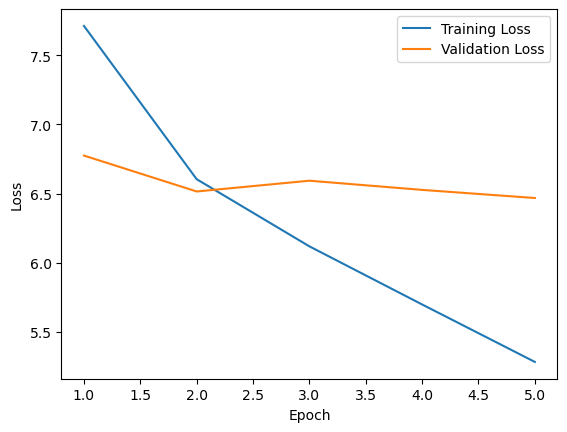

In [44]:
plt.plot(range(1, num_epochs + 1), train_loss_total, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_total, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

In [45]:
#validation_data_loader
test_dataset = VQADataset(x_test, y_test, transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((336,336)),
                    transforms.RandomRotation(30),
                    transforms.ToTensor()
                ]))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)

In [46]:
test_running_loss = 0.0
test_correct_predictions = 0
test_total_predictions = 0
test_true_labels = []
test_predicted_labels = []

vqaModel.eval()

with torch.no_grad():
    for image_inputs, text_inputs, answer_label, answer_type_label, answerable_label in tqdm(test_data_loader):
        image_inputs = image_inputs.to(device)
        answer_output, answer_type_output, answerable_output = vqaModel.forward(image_inputs, text_inputs)
        _, answer_predicted = torch.max(answer_output.data, 1)
        _, answer_type_predicted = torch.max(answer_type_output.data, 1)
        _, answerable_predicted = torch.max(answerable_output.data, 1)
        
        answer_label = torch.tensor(answer_label).to(device)
        answer_type_label = torch.tensor(answer_type_label).to(device)
        answerable_label = torch.tensor(answerable_label).to(device)

        loss_answer = loss_function(answer_output, answer_label)
        loss_answer_type = loss_function(answer_type_output, answer_type_label)
        loss_answerable = loss_function(answerable_output, answerable_label)

        test_running_loss += (loss_answer.item() + loss_answer_type.item() + loss_answerable.item())
        
        test_total_predictions += (answer_label.size(0) + answer_type_label.size(0))# + answerable_label.size(0))
        
        test_correct_predictions += ((answer_predicted==answer_label).sum().item() +
                                (answer_type_predicted==answer_type_label).sum().item())# +
                                #(answerable_predicted==answerable_label).sum().item())
        
        test_true_labels.extend(list(answerable_label))
        test_predicted_labels.extend(list(answerable_predicted))

test_loss = test_running_loss / len(test_data_loader)
test_accuracy = test_correct_predictions / test_total_predictions
test_answerability = average_precision_score(torch.tensor(test_true_labels).to("cpu").tolist(), torch.tensor(test_predicted_labels).to("cpu").tolist(), average="weighted")

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy of VQA: {test_accuracy:.4f}")
print(f"Test Answerability: {test_answerability:.4f}")

  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_28/1649850226.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_label = torch.tensor(answer_label).to(device)
/tmp/ipykernel_28/1649850226.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answer_type_label = torch.tensor(answer_type_label).to(device)
/tmp/ipykernel_28/1649850226.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  answerable_label = torch.tensor(answerable_label).to(device)
100%|██████████| 4/4 [01:41<00:00, 25.32s/it]

Test Loss: 6.5585
Test Accuracy of VQA: 0.5335
Test Answerability: 0.8144


In [ ]:
# Save the weights
torch.save(vqaModel.state_dict(), 'model_weights.pth')

# RN50

In [41]:
# x_train = np.array(x_train)
# x_train = torch.from_numpy(x_train)

# y_train = np.array(y_train)
# y_train = torch.from_numpy(y_train)
#train_data_loader
train_dataset = VQADataset(x_train, y_train, transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((448,448)),
                    transforms.RandomRotation(30),
                    transforms.ToTensor()
                ]))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)

In [42]:
#validation_data_loader
validation_dataset = VQADataset(x_val, y_val, transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((448,448)),
                    transforms.RandomRotation(30),
                    transforms.ToTensor()
                ]))
validation_data_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=shuffle)

In [36]:
# vqaModel = VQAmodel(np.unique(df['answer']))
torch.cuda.empty_cache()

clip_type = "RN50x64"
answer_num_classes = len(np.unique(df['answer_coded']))
answer_type_num_classes = len(np.unique(df['answer_type_coded']))
answerable_num_classes = len(np.unique(df['answerable_coded']))

vqaModel = VQAmodel(answer_num_classes, answer_type_num_classes, answerable_num_classes, clip_type)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vqaModel.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loss_total2 = []
val_loss_total2 = []

for param in vqaModel.clip_model.parameters():
    param.requires_grad = False

num_epochs = 5
for epoch in range(num_epochs):
    vqaModel.train()
    running_loss = 0.0 
    
    for image_inputs, text_inputs, answer_label, answer_type_label, answerable_label in tqdm(train_data_loader):
        #print("in train")
        #print(labels)
        #print("iteration :", i)
        optimizer.zero_grad()
        
        image_inputs = image_inputs.to(device)
        answer_output, answer_type_output, answerable_output = vqaModel.forward(image_inputs, text_inputs)
        
        answer_label = torch.tensor(answer_label).to(device)
        answer_type_label = torch.tensor(answer_type_label).to(device)
        answerable_label = torch.tensor(answerable_label).to(device)
        
        loss_answer = loss_function(answer_output, answer_label)
        loss_answer_type = loss_function(answer_type_output, answer_type_label)
        loss_answerable = loss_function(answerable_output, answerable_label)
        
        #loss_total = loss_answer + loss_answer_type + loss_answerable
        
        loss_answer.backward(retain_graph=True)
        loss_answer_type.backward(retain_graph=True)
        loss_answerable.backward(retain_graph=True)
        
        optimizer.step()
        
        running_loss += (loss_answer.item() + loss_answer_type.item() + loss_answerable.item())
        
    train_epoch_loss = running_loss / len(train_data_loader)
    train_loss_total2.append(train_epoch_loss)
    torch.cuda.empty_cache()
    
    vqaModel.eval()
    correct_predictions = 0
    total_predictions = 0
    true_labels = []
    predicted_labels = []
    
    with torch.no_grad():
        for image_inputs,text_inputs, answer_label, answer_type_label, answerable_label in tqdm(validation_data_loader):
            #print("in validation")
            image_inputs = image_inputs.to(device)
            answer_output, answer_type_output, answerable_output = vqaModel.forward(image_inputs, text_inputs)
            _, answer_predicted = torch.max(answer_output.data, 1)
            _, answer_type_predicted = torch.max(answer_type_output.data, 1)
            _, answerable_predicted = torch.max(answerable_output.data, 1)
            
            loss_answer = loss_function(answer_output, answer_label).to(device)
            loss_answer_type = loss_function(answer_type_output, answer_type_label).to(device)
            loss_answerable = loss_function(answerable_output, answerable_label).to(device)

            #loss_total = loss_answer + loss_answer_type + loss_answerable
        
            val_running_loss += (loss_answer.item() + loss_answer_type.item() + loss_answerable.item())
            
            answer_label = torch.tensor(answer_label).to(device)
            answer_type_label = torch.tensor(answer_type_label).to(device)
            answerable_label = torch.tensor(answerable_label).to(device)
            
            total_predictions += (answer_label.size(0) + answer_type_label.size(0))# + answerable_label.size(0))
            
            correct_predictions += ((answer_predicted==answer_label).sum().item() +
                                    (answer_type_predicted==answer_type_label).sum().item())# +
                                    #(answerable_predicted==answerable_label).sum().item())
            
            true_labels.extend(list(answerable_label))
            predicted_labels.extend(list(answerable_predicted))
    
    val_epoch_loss = val_running_loss / len(validation_data_loader)
    val_loss_total2.append(val_epoch_loss)
    accuracy = correct_predictions / total_predictions
    answerability = average_precision_score(torch.tensor(true_labels).to("cpu").tolist(), torch.tensor(predicted_labels).to("cpu").tolist(), average="weighted")
    print(f"Epoch {epoch+1}/{num_epochs} - train Loss: {train_epoch_loss:.4f} - val Loss: {val_epoch_loss:.4f} - val Accuracy of VQA: {accuracy:.4f} - val Answerability: {answerability:.4f}")
    torch.cuda.empty_cache()

100%|█████████████████████████████████████| 1.26G/1.26G [00:30<00:00, 44.9MiB/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.45 GiB (GPU 0; 15.90 GiB total capacity; 8.99 GiB already allocated; 2.22 GiB free; 12.79 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# import torch
# import clip
# from PIL import Image

# device = "cuda" if torch.cuda.is_available() else "cpu"
# model, preprocess = clip.load("ViT-B/32", device=device)

# imgFilename = df['images'].iloc[[0]].values[0]
# #         print(imgFilename)
# imagepath = '../input/vizwiz/data/Images/'+ imgFilename
# img = plt.imread(imagepath)
# image = preprocess(torch.tensor(img)).to(device)
# text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

# with torch.no_grad():
#     image_features = model.encode_image(image)
#     text_features = model.encode_text(text)
    
#     logits_per_image, logits_per_text = model(image, text)
#     probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]


        #text_inputs = text_inputs.to(device)
        #labels = labels.to(device)
#         print("image input type is :", type(image_inputs))
#         print("image type is :", type(image_inputs[0]))
        
#         print("text input type is :", type(text_inputs))
#         print("text type is :", type(text_inputs[0]))
        #print(text_inputs)
        
        #text_inputs = torch.tensor(text_inputs)
        #image_inputs = [transforms.ToPILImage()(img) for img in image_inputs]
        #image_inputs = torch.tensor(image_inputs)
        #image_inputs = image_inputs.data

In [ ]:
# import torch
# import clip
# import torch.nn as nn

# class VQAmodel(nn.Module):
#     def __init__(self, num_classes):
#         super(VQAmodel, self).__init__()
        
#         self.device = "cuda" if torch.cuda.is_available() else "cpu"
#         self.model, self.preprocess = clip.load("ViT-L/14@336px", self.device)
        
#         self.image_encoder = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.LayerNorm(256),
#             nn.Dropout(0.5),
#             nn.ReLU()
#         ).to(self.device)
        
#         self.text_encoder = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.LayerNorm(256),
#             nn.Dropout(0.5),
#             nn.ReLU()
#         ).to(self.device)
        
        
#         self.linear = nn.Linear(1536, num_classes).to(self.device)
    
#     def forward(self, image, question):
        
#         #image = [transforms.ToPILImage()(img).convert("RGB") for img in image]
#         image_features, text_features = self.encode_image_text(image, question)
# #         text_features = self.encode_text(question)
# #         image_features = self.encode_image(image)
#         image_features = image_features.to(self.device).to(torch.float32)
#         text_features = text_features.to(self.device).to(torch.float32)
        
# #         print("type of image_features :", image_features.dtype)
# #         print("type of text_features :", text_features.dtype)
#         combined_features = torch.cat((text_features, image_features), dim=1)
        
#         combined_features = combined_features.to(self.device).to(torch.float32)
# #         print("type of combined :", combined_features.dtype)
#         output = self.linear(combined_features)
#         return output
        
    
#     def encode_image_text(self, image, question):
#         device = "cuda" if torch.cuda.is_available() else "cpu"
#         #model, preprocess = clip.load("ViT-L/14@336px", device=device)
#         self.model.to(device)
#         image.to(device)
        
#         #image = self.preprocess(image)#.to(device)
#         text = clip.tokenize(list(question)).to(device)

#         with torch.no_grad():
#             image_features = self.model.encode_image(image)
#             text_features = self.model.encode_text(text)
#         return image_features, text_features

In [ ]:
#     def encode_image_text(self, images, questions):
#         device = "cuda" if torch.cuda.is_available() else "cpu"
        
        
#         images_features = []
#         text_features = []
        
#         with torch.no_grad():
#             for img in images:
#                 image = self.preprocess(img).to(device)
#                 image_feature = self.model.encode_image(image)
#             images_features.append(image_feature)
          
#         with torch.no_grad():
#             for question in questions:
#                 text = clip.tokenize(list(question)).to(device)
#                 text_feature = self.model.encode_text(text)
#             text_features.append(text_feature)
#         return images_features, text_features 
            
        
#         #model, preprocess = clip.load("ViT-L/14@336px", device=device)
#         return images_features, text_features
        
        
    
#     def encode_text(self, question):
#         #tokens = [self.clip_preprocess(token) for token in question]
#         print("device is :", self.device)
#         question = question.to(self.device)
#         tokens = clip.tokenize(list(question)).to(self.device)
        
#         #question_preprocessed = self.clip_preprocess(question)
        
#         #tokens_cuda = [token.to("cuda") for token in tokens]
#         with torch.no_grad():
#             text_features = self.clip_model.encode_text(tokens)
            
            
#         text_features = self.text_encoder(text_features)
#         return text_features
            
    
#     def encode_image(self, image):
#         image_preprocessed = self.clip_preprocess(image).to(self.device)
        
#         with torch.no_grad():
#             image_features = self.clip_model.encode_image(image_preprocessed)
            
#         image_features = self.image_encoder(image_features)
#         return image_features